In [1]:
import time 
import datetime
from sklearn import metrics,cluster,mixture
from matplotlib import pyplot as plt
import numpy as np
import cv2
import seaborn as sns
from preprocessing import *

570

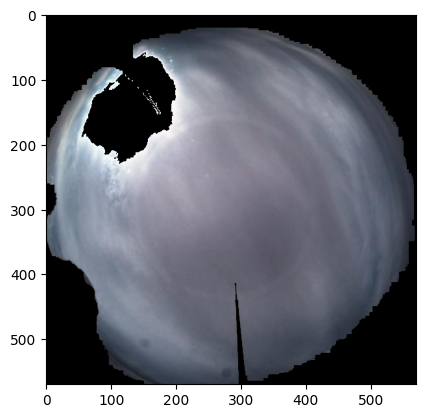

In [2]:
path = r"C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-17\638541802295123622.png"
mask = cv2.imread(r"mask_delete_5.png",cv2.IMREAD_GRAYSCALE)
mask = crop_center(mask,crop_size=570)
img = load_single_image(path,mask=mask,apply_crop_sun=True,crop_size=570)[0]
plt.imshow(img[0])
len(img[0])

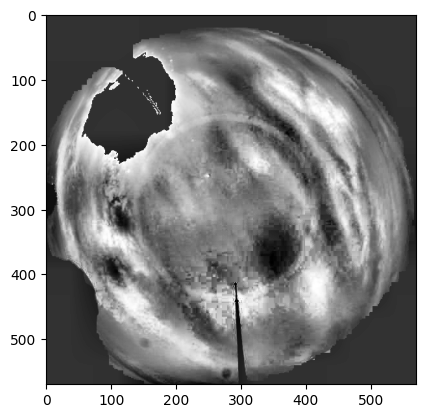

In [3]:
from ClassPrediction import prediction
pred = prediction()
masked= pred.RBsingle(input=img)[0][0]
clahe = cv2.createCLAHE(clipLimit=50, tileGridSize=(8, 8))
masked = clahe.apply(masked)
plt.imshow(masked,cmap='gray')

In [4]:
properties = ['contrast',
            'dissimilarity',
            'homogeneity',
            'energy',
            'correlation',
            'ASM']

mask_path = r'C:\Users\ASUS\Documents\NARIT_internship_data\Mask_obs\mask_delete_5.png'
mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
mask = mask[(int(mask.shape[0]/2)-270):int((mask.shape[0]/2)+270),int((mask.shape[1]/2)-290):int((mask.shape[1]/2)+280)]
path = r"C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-06"
images,filename = load_images_and_preprocess(path,mask=mask,apply_crop_sun=True)
masked,value,RB = RBratio(input=images)

In [13]:
grad = Edging(input=masked,ker_size=7,cliplimit=50,gridsize=8,bias=40)

82.91432748539013
Cloud percentage : 91.19831206172559 %


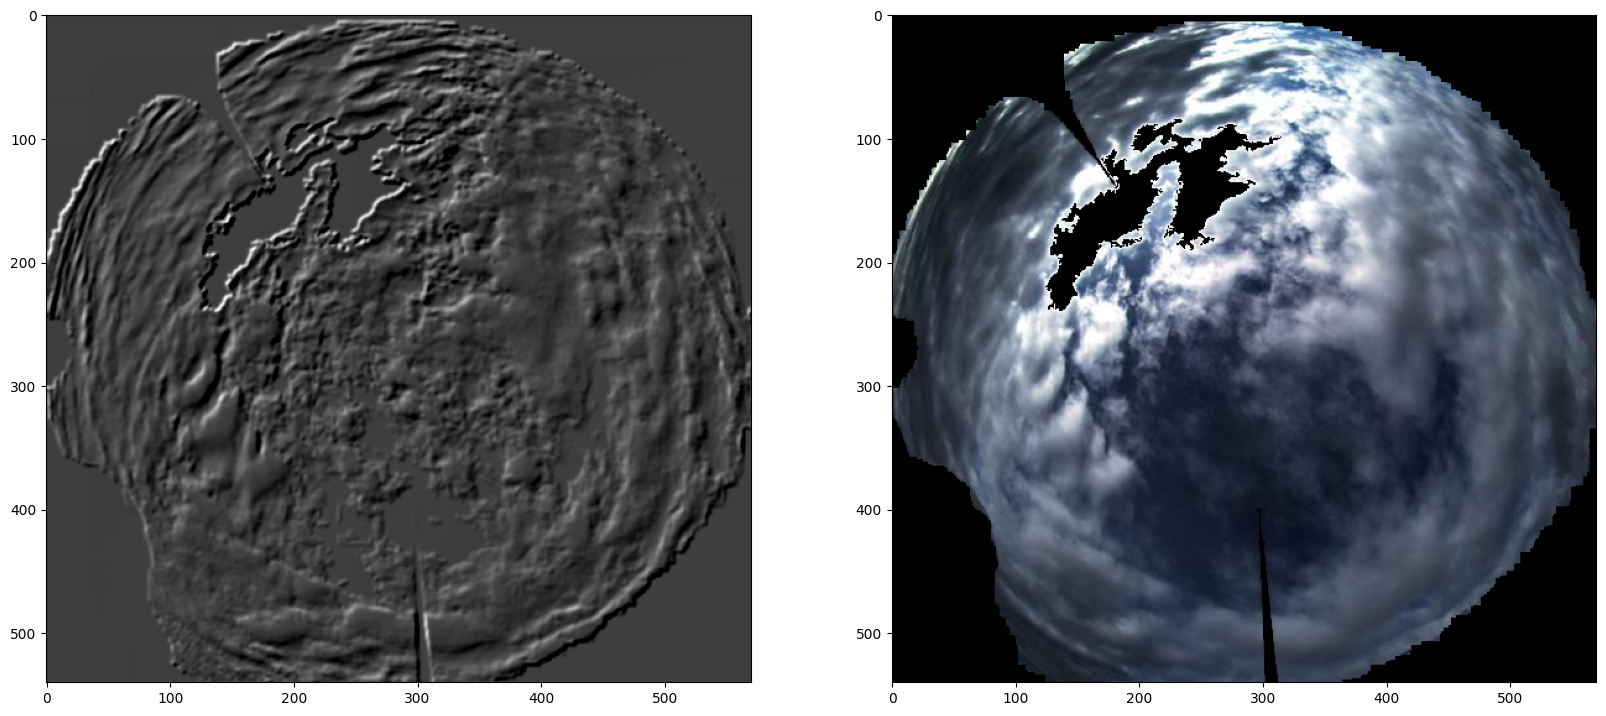

In [12]:
im = 130
print(value[im])
tresh = cv2.convertScaleAbs(grad[im])
print("Cloud percentage :",showCloudRatio(masked,mask=mask,number=im)*100,"%")
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(grad[im],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(images[im],cmap='gray')

In [7]:
#df.to_csv(r'C:\Users\ASUS\Documents\NARIT_internship_data\CSV_dataset_sobel\GLCM_SobelFeature_ALL_sky_28June_dis3_ang45_test.csv')

In [8]:
df = df.loc[df["intensity"] >= 75]

NameError: name 'df' is not defined

In [ ]:
df2 = df2.loc[df2["intensity"] >= 75]

In [ ]:
sns.scatterplot(data=df,x=df['dissimilarity'],y=df['ASM'],hue=df['intensity'])

In [ ]:
sns.scatterplot(data=df2,x=df2['dissimilarity'],y=df2['ASM'],hue=df2['intensity'])

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.heatmap(df2.corr(),annot=True)